<a href="https://colab.research.google.com/github/Collin-Campbell/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module3-Tune/LS_DS_423_Tune_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** similar to a biological neuron in that it accepts input and provides an output based on an activation threshold
- **Input Layer:** visible layer of input variables
- **Hidden Layer:** all layers between the input and output
- **Output Layer:** the layer that produces the output variables
- **Activation Function:** maps the input to the output

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

In [ ]:
# Backpropagation is simply comparing the outputs to an expected answer, and 
# then adjusting accordingly in order to minimize that difference.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

In [ ]:
# First, we defined an activation function.  For example, if the sum of the weighted input
# is less than 0, then the output should be 0.  Else, the output is 1.  We then
# applied random weights to the input data, set a learning rate, and ran it through
# a certain number of iterations.  Each iteration, the difference between our 
# simple perceptron's output and the expected output decreased.  Depending on the 
# starting weights, learning rate, and number of iterations, we could minimize 
# that error and increase the accuracy of our model.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [24]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [25]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(1,input_dim=2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X,y, epochs=100, batch_size=8)

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [27]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(Dense(64, input_dim=2, activation='sigmoid'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])

h2 = model2.fit(X,y,
                epochs=100,
                batch_size=8,
                callbacks=[myCallback()])

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


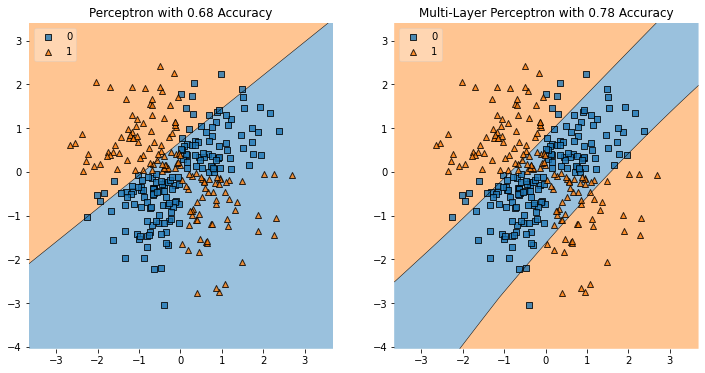

In [32]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [ ]:
# Because of the additional hidden layers, an MLP is able to utilize backpropagation
# (and adjust the weights), but also transfer that information to the subsequent
# layer.  This allows the MLP to more accurately report the results.
#  The simple perceptron is unable to do this.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1


In [46]:
# binary classification problem

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [41]:
target = 'target'

X = df.drop(columns=target)
y = df['target']

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [43]:
# scaling features

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [45]:
print(scaled_X.shape)
print(y.shape)

(303, 13)
(303,)


In [47]:
# Import keras models and layers
from keras import models
from keras import layers

# Function to return a compiled network
def make_network(optimizer='adam'):

    # Instantiate a sequential model
    network = models.Sequential()

    # Add an input layer (shape=number of features)
    network.add(layers.Dense(units=8, activation='relu', input_shape=(13,)))

    # Add a hidden layer with 8 neurons
    network.add(layers.Dense(units=8, activation='relu'))

    # Add an output layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric

    # Return compiled network
    return network

In [55]:
# Scikit-learn wrappers for keras
from keras.wrappers.scikit_learn import KerasClassifier
neural_network = KerasClassifier(build_fn=make_network, verbose=0)

In [ ]:
# Define hyperparameter space over which to search
epochs = [10, 25]
batches = [4, 8, 32]
optimizers = ['rmsprop', 'adam']

# Make a dictionary of the parameters
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Create and fit the grid search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=neural_network, cv=5, param_grid=hyperparameters)
grid_result = grid.fit(scaled_X, y)

In [60]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828197 using {'batch_size': 8, 'epochs': 25, 'optimizer': 'rmsprop'}
0.795519 (0.041784) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'rmsprop'}
0.788634 (0.029558) with: {'batch_size': 4, 'epochs': 10, 'optimizer': 'adam'}
0.815246 (0.037739) with: {'batch_size': 4, 'epochs': 25, 'optimizer': 'rmsprop'}
0.821749 (0.033801) with: {'batch_size': 4, 'epochs': 25, 'optimizer': 'adam'}
0.801913 (0.048013) with: {'batch_size': 8, 'epochs': 10, 'optimizer': 'rmsprop'}
0.772077 (0.044386) with: {'batch_size': 8, 'epochs': 10, 'optimizer': 'adam'}
0.828197 (0.039204) with: {'batch_size': 8, 'epochs': 25, 'optimizer': 'rmsprop'}
0.825027 (0.051738) with: {'batch_size': 8, 'epochs': 25, 'optimizer': 'adam'}
0.650000 (0.078050) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'rmsprop'}
0.649399 (0.094956) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
0.785519 (0.066411) with: {'batch_size': 32, 'epochs': 25, 'optimizer': 'rmsprop'}
0.792240 (0.038840) with: {'batch